In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("C:\\Users\\Admin\\Downloads\\3.12.+Example.csv")

In [3]:
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


Text(0, 0.5, 'Loyalty')

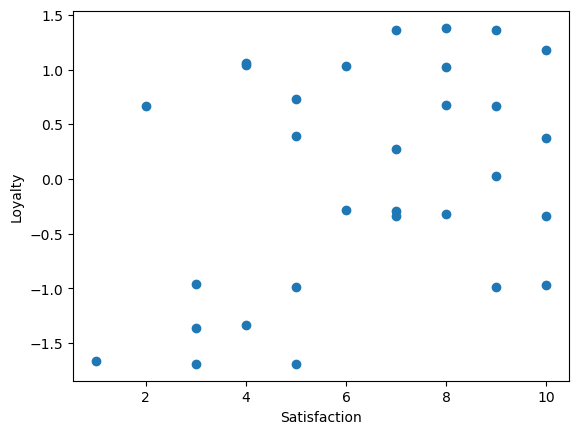

In [6]:
plt.scatter(data["Satisfaction"], data["Loyalty"])
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")

In [7]:
x=data.copy()

In [8]:
kmeans=KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

## Clustering

In [18]:
clusters = x.copy()
clusters

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


In [20]:
clusters = x.copy()

In [23]:
clusters["cluster_pred"]=kmeans.fit_predict(x)

Text(0, 0.5, 'Loyalty')

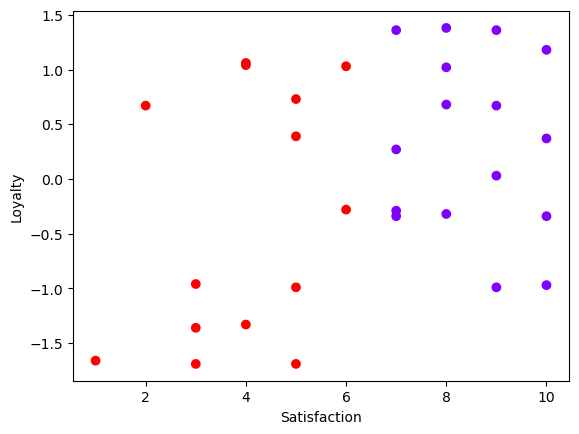

In [29]:
plt.scatter(clusters["Satisfaction"], clusters["Loyalty"],c=clusters["cluster_pred"],cmap="rainbow")
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")

## Standardizing the variables

In [32]:
from sklearn import preprocessing 
x_scaled = preprocessing.scale(x)
x_scaled
##standardizing each column according to itself

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## Take advantage of the elbow method


In [33]:
wcss=[]
for i in range(1,10):
    kmeans=KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[59.99999999999999,
 29.818973034723143,
 17.913349527387965,
 10.24718180592842,
 7.792695153937187,
 6.618560114942933,
 5.326631124753925,
 4.427787793666339,
 3.7799886162052667]

Text(0, 0.5, 'wcss')

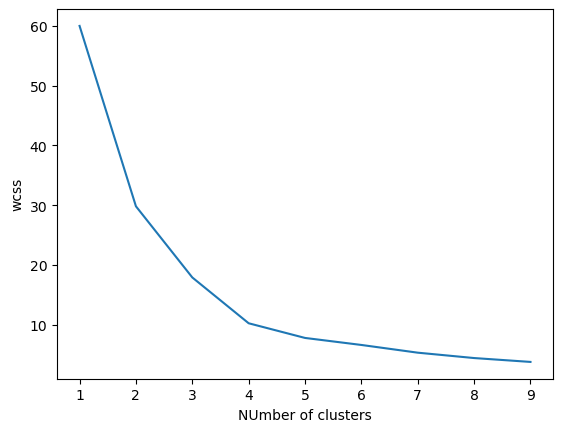

In [34]:
plt.plot(range(1,10),wcss)
plt.xlabel("NUmber of clusters")
plt.ylabel("wcss")

## Explore clusturing solutions and select the number of clusters

In [41]:
kmeans_new=KMeans(4)
kmeans_new.fit(x_scaled)
cluster_new=x.copy()
cluster_new["cluster_pred"]=kmeans_new.fit_predict(x_scaled)

In [37]:
cluster_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,0
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


Text(0, 0.5, 'Loyalty')

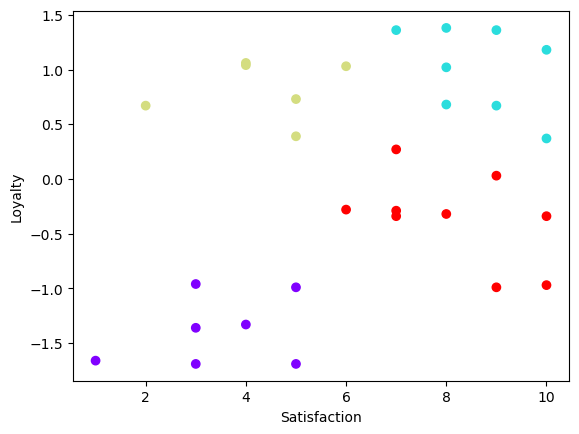

In [42]:
plt.scatter(cluster_new["Satisfaction"], cluster_new["Loyalty"],c=cluster_new["cluster_pred"],cmap="rainbow")
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")